# Homework 4, Option 1

James Crim

NOTE: This homework was done in a python 3.7 environment in Anaconda, due to version issues

# Setup

In [43]:
!pip install matplotlib
import matplotlib.pyplot as plt

In [11]:
# get data (takes a few mins)
!pip install wget
import wget
raw_dat_wget = wget.download('http://magnitude.plasticity.ai/word2vec/GoogleNews-vectors-negative300.magnitude')

In [12]:
# load data as a magnitude object
from pymagnitude import *
file_path = "GoogleNews-vectors-negative300.magnitude"
vectors = Magnitude(file_path)

In [13]:
# test that setup worked properly, should be ~0.691
vectors.distance("cat", "dog")

0.69145405

# Assignment Questions

## Question 1

In [14]:
# get number of vector dimensions
vectors.dim

300

## Question 2

In [17]:
# find the 5 words most similar to "picnic", excluding "picnic" itself
vectors.most_similar("picnic", topn = 5)

[('picnics', 0.7400875),
 ('picnic_lunch', 0.721374),
 ('Picnic', 0.700534),
 ('potluck_picnic', 0.6683274),
 ('picnic_supper', 0.65189123)]

In [18]:
# doing the same thing, but looking for 5 words that don't include the word "picnic" at all
vectors.most_similar("picnic", topn = 20)
# they are cookout, hiking_biking_camping, barbecue/barbeque, pig_roast, and potluck

[('picnics', 0.7400875),
 ('picnic_lunch', 0.721374),
 ('Picnic', 0.700534),
 ('potluck_picnic', 0.6683274),
 ('picnic_supper', 0.65189123),
 ('picnicking', 0.63550216),
 ('cookout', 0.63243484),
 ('Hiking_biking_camping', 0.6256069),
 ('barbeque', 0.62256277),
 ('barbecue', 0.6195759),
 ('picnic_lunches', 0.6143184),
 ('pig_roast', 0.61019313),
 ('Bring_picnic', 0.6033048),
 ('potluck', 0.60114384),
 ('picnic_tables', 0.6006263),
 ('Hawaiian_luau', 0.5982951),
 ('wiener_roast', 0.59388626),
 ('potluck_dinner', 0.5916978),
 ('fish_fry', 0.58994764),
 ('gazebo', 0.58934724)]

## Question 3

In [21]:
# determine which of these words is most dissimilar from the others, ie "the odd one out"
words_to_look_at = ['tissue', 'papyrus', 'manila', 'newsprint', 'parchment', 'gazette']
vectors.doesnt_match(words_to_look_at)
# it's tissue!

'tissue'

# Question 4

In [24]:
# solve the analogy "leg is to jump as X is to throw" using vector math!
# this is taking the difference vector of "leg" and "jump" and overlaying it on "throw" and seeing what are the closest words
vectors.most_similar(positive = ["throw", "leg"], negative = ["jump"])
# the answer is "forearm"!

[('forearm', 0.48294652),
 ('shin', 0.47376165),
 ('elbow', 0.4679689),
 ('metacarpal_bone', 0.46781474),
 ('metacarpal_bones', 0.46605822),
 ('ankle', 0.46434426),
 ('shoulder', 0.46183354),
 ('thigh', 0.45393682),
 ('knee', 0.4455707),
 ('ulna_bone', 0.4423491)]

# Data Visualization

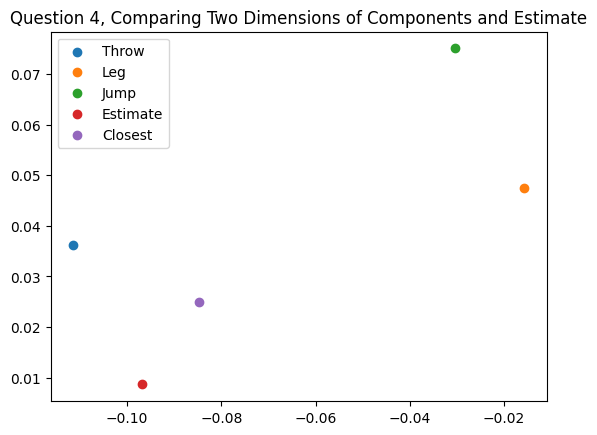

In [76]:
# looking at two selected dimesions to get an idea of how the vectors for question 4 relate visually
offset = 11
estimate = vectors.query("throw") + vectors.query("leg") - vectors.query("jump")
estimate = estimate[(0+offset):(2+offset)]
closest = vectors.query("forearm")[(0+offset):(2+offset)]
throw = vectors.query("throw")[(0+offset):(2+offset)]
leg = vectors.query("leg")[(0+offset):(2+offset)]
jump = vectors.query("jump")[(0+offset):(2+offset)]

plt.scatter(throw[0], throw[1]);
plt.scatter(leg[0], leg[1]);
plt.scatter(jump[0], jump[1]);
plt.scatter(estimate[0], estimate[1]);
plt.scatter(closest[0], closest[1]);
plt.title("Question 4, Comparing Two Dimensions of Components and Estimate");
plt.legend(['Throw', 'Leg', 'Jump', 'Estimate', 'Closest']);